Журавлев К. В. ПИ20-1 Лабораторная работа 5.2

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats

**Задание 1**

На сайте https://www.kaggle.com/datasets выбрать набор данных каждому студенту индивидуально. Лучше всего выбирать датасеты в предметной области исходя из личных предпочтений. Не стоит выбирать слишком большие наборы данных (лучше не более 100 Мб).

In [ ]:
data = pd.read_csv("mxmh_survey_results.csv")
data

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


**Задание 2**

В начале анализа следует привести общую характеристику набора данных: количество наблюдений, признаков, предметная область, содержание признаков, характер целевой переменной, задача обучения (регрессия, классификация, количество классов).

In [ ]:
data.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [ ]:
data.shape

(736, 33)

In [ ]:
data.isna().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,735.0,2.520680e+01,1.205497e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


In [ ]:
data.describe(exclude='number').T

,count,unique,top,freq
Timestamp,736,735,8/28/2022 16:15:08,2
Primary streaming service,735,6,Spotify,458
While working,733,2,Yes,579
Instrumentalist,732,2,No,497
Composer,735,2,No,609
Fav genre,736,16,Rock,188
Exploratory,736,2,Yes,525
Foreign languages,732,2,Yes,404
Frequency [Classical],736,4,Rarely,259
Frequency [Country],736,4,Never,343


In [ ]:
cat = [i for i in data.columns if data[i].dtypes == 'O']
cat

['Timestamp',
 'Primary streaming service',
 'While working',
 'Instrumentalist',
 'Composer',
 'Fav genre',
 'Exploratory',
 'Foreign languages',
 'Frequency [Classical]',
 'Frequency [Country]',
 'Frequency [EDM]',
 'Frequency [Folk]',
 'Frequency [Gospel]',
 'Frequency [Hip hop]',
 'Frequency [Jazz]',
 'Frequency [K pop]',
 'Frequency [Latin]',
 'Frequency [Lofi]',
 'Frequency [Metal]',
 'Frequency [Pop]',
 'Frequency [R&B]',
 'Frequency [Rap]',
 'Frequency [Rock]',
 'Frequency [Video game music]',
 'Music effects',
 'Permissions']

In [ ]:
for item in cat:
    print(f"{item} -> {len(set(data[item].unique()))}")

Timestamp -> 735
Primary streaming service -> 7
While working -> 3
Instrumentalist -> 3
Composer -> 3
Fav genre -> 16
Exploratory -> 2
Foreign languages -> 3
Frequency [Classical] -> 4
Frequency [Country] -> 4
Frequency [EDM] -> 4
Frequency [Folk] -> 4
Frequency [Gospel] -> 4
Frequency [Hip hop] -> 4
Frequency [Jazz] -> 4
Frequency [K pop] -> 4
Frequency [Latin] -> 4
Frequency [Lofi] -> 4
Frequency [Metal] -> 4
Frequency [Pop] -> 4
Frequency [R&B] -> 4
Frequency [Rap] -> 4
Frequency [Rock] -> 4
Frequency [Video game music] -> 4
Music effects -> 4
Permissions -> 1


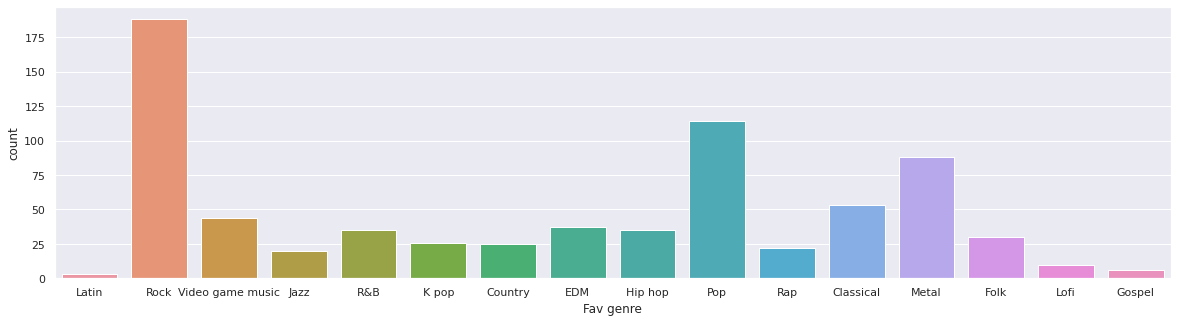

In [ ]:
sns.countplot(data['Fav genre']);
sns.set(rc={'figure.figsize':(5, 20)})

**Задание 3**

Провести в Jupyter средствами pandas, sklearn, seaborn описательный анализ выбранного набора включающего (но не ограниченного) следующие шаги:

исследование шкалы измерения каждого существенного признака;

построение эмпирического распределения каждого существенного признака;

анализ количества и распределения отсутствующих значений;

построение совместного распределения каждого признака и целевой переменной;

построение корреляционной матрицы.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,735.0,2.520680e+01,1.205497e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


In [ ]:
num = [i for i in data.columns if data[i].dtypes != 'O']
num

['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD']

Построение эмпирического распределения каждого существенного признака

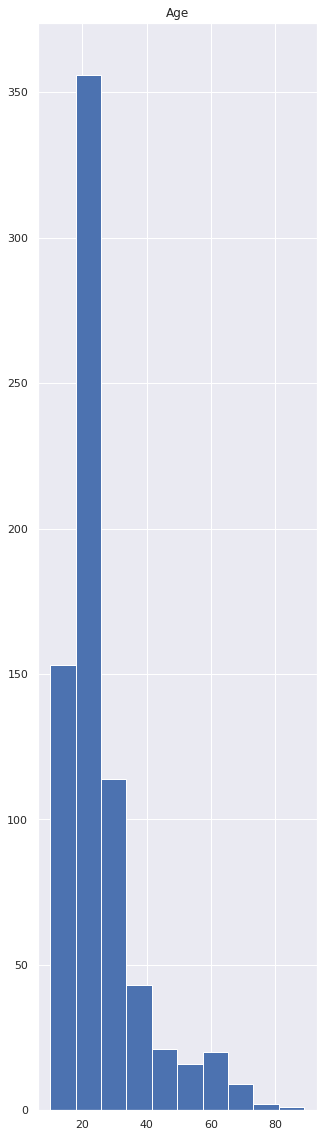

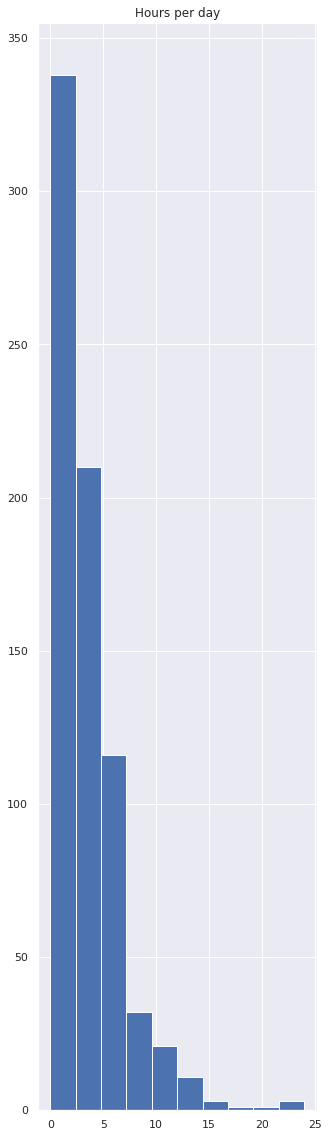

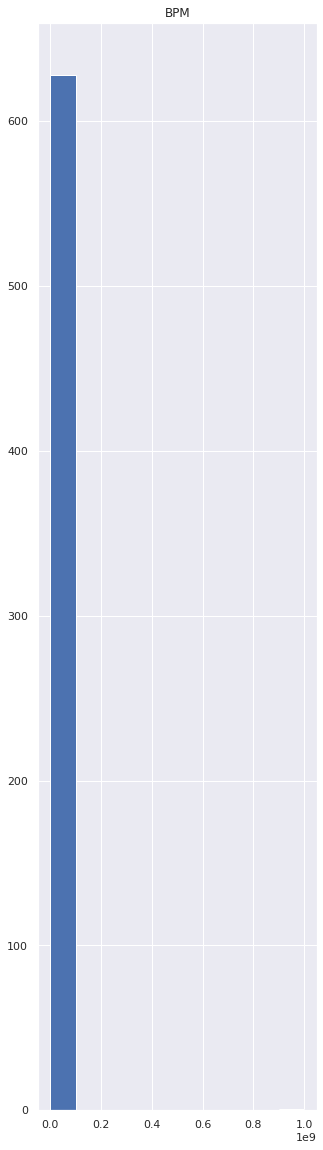

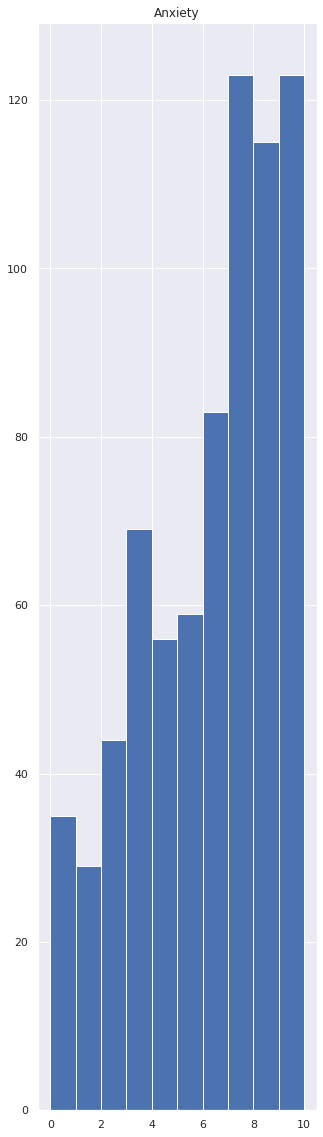

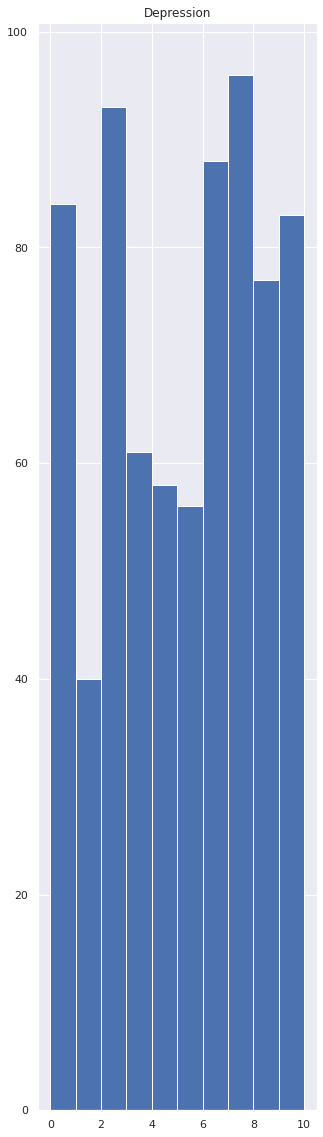

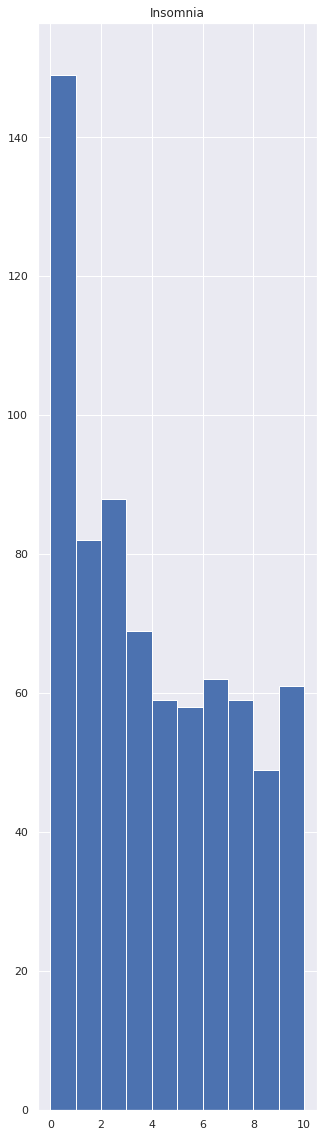

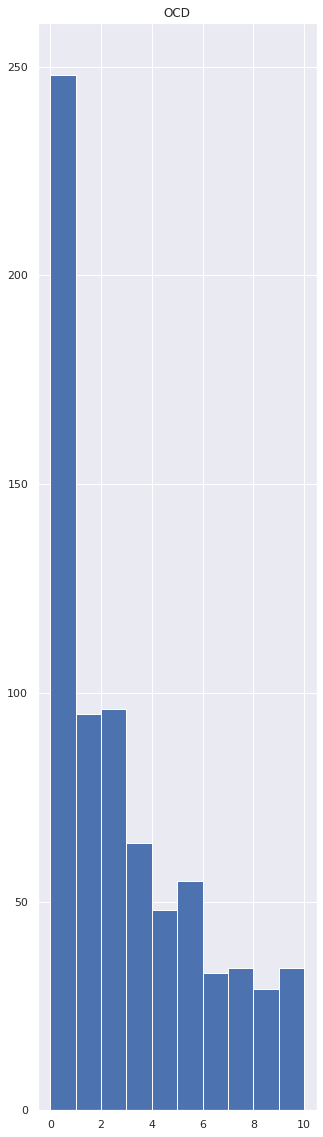

In [ ]:
for column in num:
    plt.hist(data[column])
    plt.title(column)
    plt.show()

Анализ количества и распределения отсутствующих значений;

In [ ]:
data.shape

(736, 33)

In [ ]:
data.isna().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

Построение совместного распределения каждого признака и целевой переменной

In [ ]:
grouped_data = pd.DataFrame(data.groupby(['Fav genre']).count())
grouped_data

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
Fav genre,,,,,,,,,,,,,,,,,,,,,
Classical,53,53,53,53,53,52,53,53,52,40,...,53,53,53,53,53,53,53,53,53,53
Country,25,25,24,25,25,25,25,25,25,21,...,25,25,25,25,25,25,25,25,25,25
EDM,37,37,37,37,37,37,37,37,37,36,...,37,37,37,37,37,37,37,37,36,37
Folk,30,30,30,30,30,30,30,30,30,26,...,30,30,30,30,30,30,30,30,29,30
Gospel,6,6,6,6,6,6,6,6,6,4,...,6,6,6,6,6,6,6,6,6,6
Hip hop,35,34,35,35,35,35,35,35,35,32,...,35,35,35,35,35,35,35,35,35,35
Jazz,20,20,20,20,20,20,20,20,20,19,...,20,20,20,20,20,20,20,20,20,20
K pop,26,26,26,26,24,24,25,26,25,25,...,26,26,26,26,26,26,26,26,23,26
Latin,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,2,3


Построение корреляционной матрицы

In [ ]:
data.corr()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
Age,1.000000,-0.044638,-0.029928,-0.176662,-0.121563,0.006909,-0.130114
Hours per day,-0.044638,1.000000,0.042554,0.049319,0.110527,0.141821,0.118729
BPM,-0.029928,0.042554,1.000000,-0.027050,0.041371,0.053591,0.018927
Anxiety,-0.176662,0.049319,-0.027050,1.000000,0.519969,0.292669,0.348350
Depression,-0.121563,0.110527,0.041371,0.519969,1.000000,0.378996,0.196988
Insomnia,0.006909,0.141821,0.053591,0.292669,0.378996,1.000000,0.226354
OCD,-0.130114,0.118729,0.018927,0.348350,0.196988,0.226354,1.000000


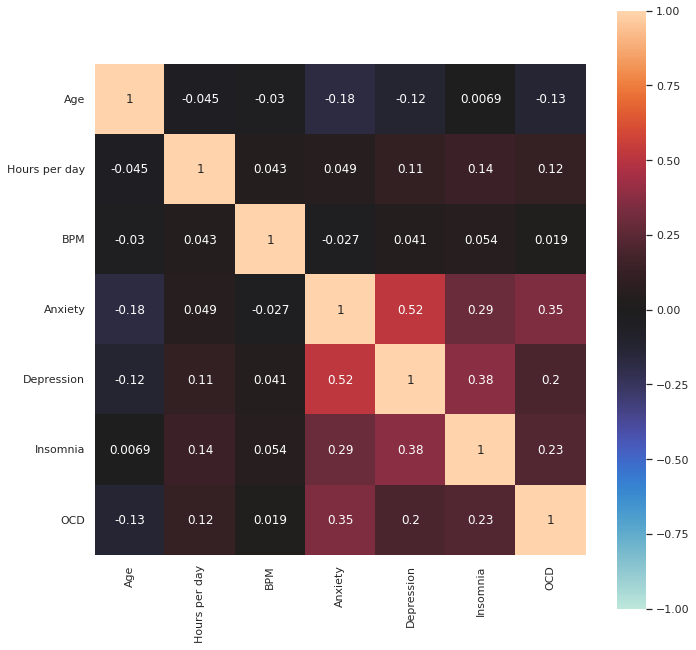

In [ ]:
ax = sns.heatmap(
    data.corr(),
    annot=True,
    annot_kws={'size': 12},
    vmin=-1, vmax=1, center=0,
    square=True
)
ax.figure.set_size_inches(11, 11)

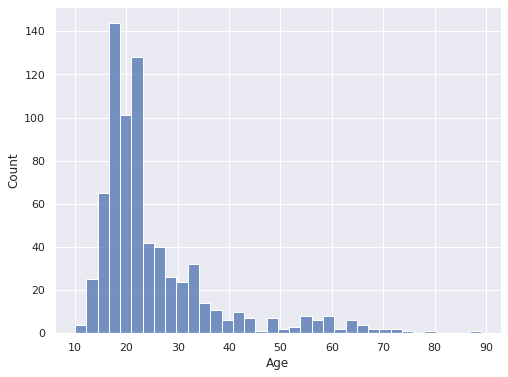

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data['Age'])
plt.show()

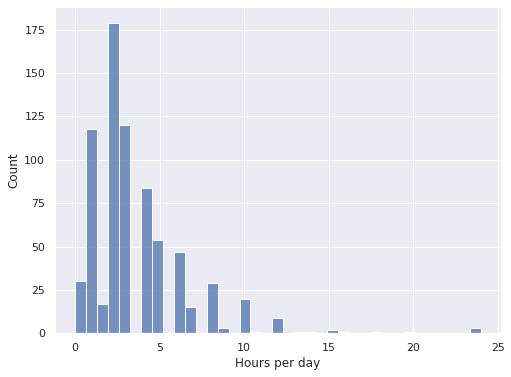

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data['Hours per day'])
plt.show()

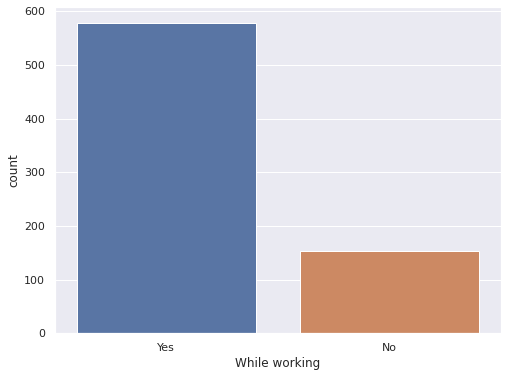

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['While working'])
plt.show()

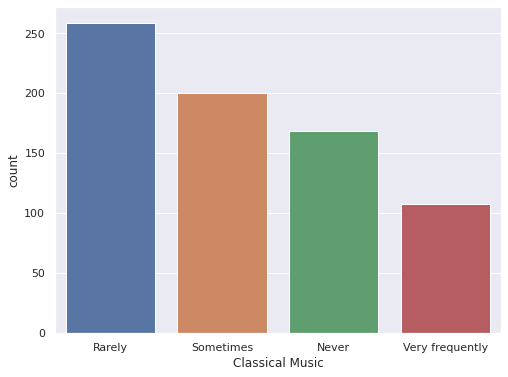

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [Classical]'])
plt.xlabel('Classical Music')
plt.show()

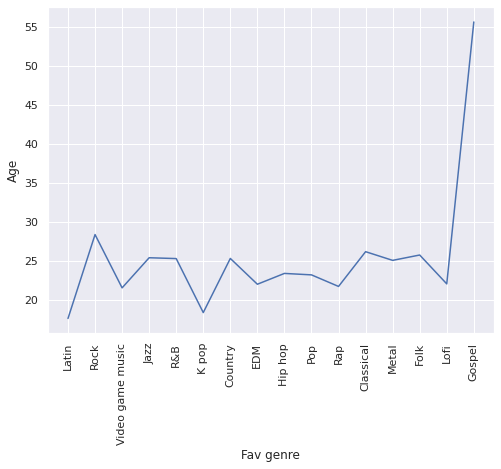

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x=data['Fav genre'], y=data['Age'], ci=None)
plt.xticks(rotation=90)
plt.show()

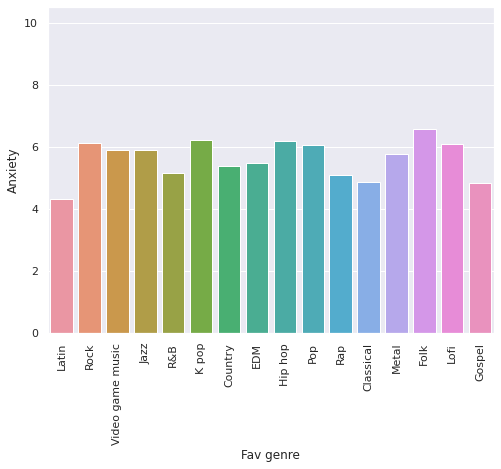

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['Anxiety'], errwidth=0)
plt.xticks(rotation=90)
plt.show()

**Задание 5**

Провести подготовительную обработку данных, включающую следующие шаги: 6. удаление или заполнение отсутствующих значений; 7. приведение всех признаков к бинарной либо числовой шкале; 8. удаление несущественных либо избыточных признаков; 9. другие необходимые действия в зависимости от набора данных и задачи (группировка, удаление аномалий, и др.).

In [ ]:
fixed_data = data.copy()
fixed_data

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [ ]:
fixed_data.isna().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [ ]:
fixed_data.drop(['Timestamp', 'Permissions', 'BPM', 'Foreign languages', 'Instrumentalist', 'Primary streaming service', 'Exploratory', 'Frequency [Pop]', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]'], axis=1, inplace=True)

In [ ]:
fixed_data['Age'] = fixed_data['Age'].fillna(round(fixed_data['Age'].mean(), 0))
fixed_data['While working'] = fixed_data['While working'].fillna(fixed_data['While working'].mode()[0])
fixed_data['Composer'] = fixed_data['Composer'].fillna(fixed_data['Composer'].mode()[0])
fixed_data['Music effects'] = fixed_data['Music effects'].fillna(fixed_data['Music effects'].mode()[0])

In [ ]:
fixed_data.isna().sum()

Age              0
Hours per day    0
While working    0
Composer         0
Fav genre        0
Anxiety          0
Depression       0
Insomnia         0
OCD              0
Music effects    0
dtype: int64

In [ ]:
while_working = pd.get_dummies(fixed_data['While working'], prefix='whileWorking', drop_first=True)
while_working

,whileWorking_Yes
0,1
1,1
2,0
3,1
4,1
...,...
731,1
732,1
733,1
734,1


In [ ]:
fixed_data = pd.concat([while_working, fixed_data], axis=1)
fixed_data = fixed_data.drop('While working', axis=1)
fixed_data

,whileWorking_Yes,Age,Hours per day,Composer,Fav genre,Anxiety,Depression,Insomnia,OCD,Music effects
0,1,18.0,3.0,Yes,Latin,3.0,0.0,1.0,0.0,Improve
1,1,63.0,1.5,No,Rock,7.0,2.0,2.0,1.0,Improve
2,0,18.0,4.0,No,Video game music,7.0,7.0,10.0,2.0,No effect
3,1,61.0,2.5,Yes,Jazz,9.0,7.0,3.0,3.0,Improve
4,1,18.0,4.0,No,R&B,7.0,2.0,5.0,9.0,Improve
...,...,...,...,...,...,...,...,...,...,...
731,1,17.0,2.0,No,Rock,7.0,6.0,0.0,9.0,Improve
732,1,18.0,1.0,No,Pop,3.0,2.0,2.0,5.0,Improve
733,1,19.0,6.0,Yes,Rap,2.0,2.0,2.0,2.0,Improve
734,1,19.0,5.0,No,Classical,2.0,3.0,2.0,1.0,Improve


In [ ]:
composer = pd.get_dummies(fixed_data['Composer'], prefix='composer', drop_first=True)
fixed_data = pd.concat([composer, fixed_data], axis=1)
fixed_data = fixed_data.drop('Composer', axis=1)
fav_genre = pd.get_dummies(fixed_data['Fav genre'], prefix='favGenre', drop_first=True)
fixed_data = pd.concat([fav_genre, fixed_data], axis=1)
fixed_data = fixed_data.drop('Fav genre', axis=1)
frequency_meffects = pd.get_dummies(fixed_data['Music effects'], prefix='freqMusicEffects', drop_first=True)
fixed_data = pd.concat([frequency_meffects, fixed_data], axis=1)
fixed_data = fixed_data.drop('Music effects', axis=1)

In [ ]:
fixed_data.corr()

,freqMusicEffects_No effect,freqMusicEffects_Worsen,favGenre_Country,favGenre_EDM,favGenre_Folk,favGenre_Gospel,favGenre_Hip hop,favGenre_Jazz,favGenre_K pop,favGenre_Latin,...,favGenre_Rock,favGenre_Video game music,composer_Yes,whileWorking_Yes,Age,Hours per day,Anxiety,Depression,Insomnia,OCD
freqMusicEffects_No effect,1.000000,-0.083948,-0.013206,-0.036901,-0.014517,-0.049496,-0.061274,-0.011770,-0.034476,0.015776,...,0.072827,0.053096,-0.085179,-0.155966,0.069259,-0.022894,-0.139536,-0.075304,-0.012348,-0.053109
freqMusicEffects_Worsen,-0.083948,1.000000,-0.028833,-0.035377,-0.031697,-0.013940,-0.034359,-0.025699,-0.029425,-0.009837,...,0.055120,0.113832,-0.021859,-0.054322,-0.032691,-0.041059,0.051073,0.120921,0.039404,0.026010
favGenre_Country,-0.013206,-0.028833,1.000000,-0.043142,-0.038654,-0.017000,-0.041900,-0.031340,-0.035883,-0.011996,...,-0.109831,-0.047283,-0.005573,-0.032620,0.002391,-0.009466,-0.029401,-0.029501,-0.061872,0.008106
favGenre_EDM,-0.036901,-0.035377,-0.043142,1.000000,-0.047426,-0.020858,-0.051409,-0.038452,-0.044027,-0.014719,...,-0.134757,-0.058014,0.010990,-0.003946,-0.060247,0.077688,-0.028945,0.033981,0.017481,0.029388
favGenre_Folk,-0.014517,-0.031697,-0.038654,-0.047426,1.000000,-0.018688,-0.046061,-0.034452,-0.039447,-0.013188,...,-0.120739,-0.051979,-0.020720,0.021575,0.010162,-0.022894,0.053842,0.018420,-0.007020,-0.031735
favGenre_Gospel,-0.049496,-0.013940,-0.017000,-0.020858,-0.018688,1.000000,-0.020258,-0.015152,-0.017349,-0.005800,...,-0.053101,-0.022861,0.039023,0.009489,0.229388,-0.035883,-0.032621,-0.063784,0.046845,-0.073544
favGenre_Hip hop,-0.061274,-0.034359,-0.041900,-0.051409,-0.046061,-0.020258,1.000000,-0.037345,-0.042759,-0.014295,...,-0.130877,-0.056344,0.000138,-0.010620,-0.031940,0.026273,0.029009,0.074103,-0.022433,0.006063
favGenre_Jazz,-0.011770,-0.025699,-0.031340,-0.038452,-0.034452,-0.015152,-0.037345,1.000000,-0.031983,-0.010692,...,-0.097892,-0.042144,0.123705,0.024340,0.003380,0.102298,0.003734,-0.016355,0.006040,0.009579
favGenre_K pop,-0.034476,-0.029425,-0.035883,-0.044027,-0.039447,-0.017349,-0.042759,-0.031983,1.000000,-0.012242,...,-0.112085,-0.048254,-0.067432,0.062248,-0.107828,0.027017,0.026953,-0.023590,-0.017168,-0.006655
favGenre_Latin,0.015776,-0.009837,-0.011996,-0.014719,-0.013188,-0.005800,-0.014295,-0.010692,-0.012242,1.000000,...,-0.037471,-0.016132,0.027537,0.032908,-0.040068,0.065407,-0.034479,-0.037964,-0.008397,-0.021863


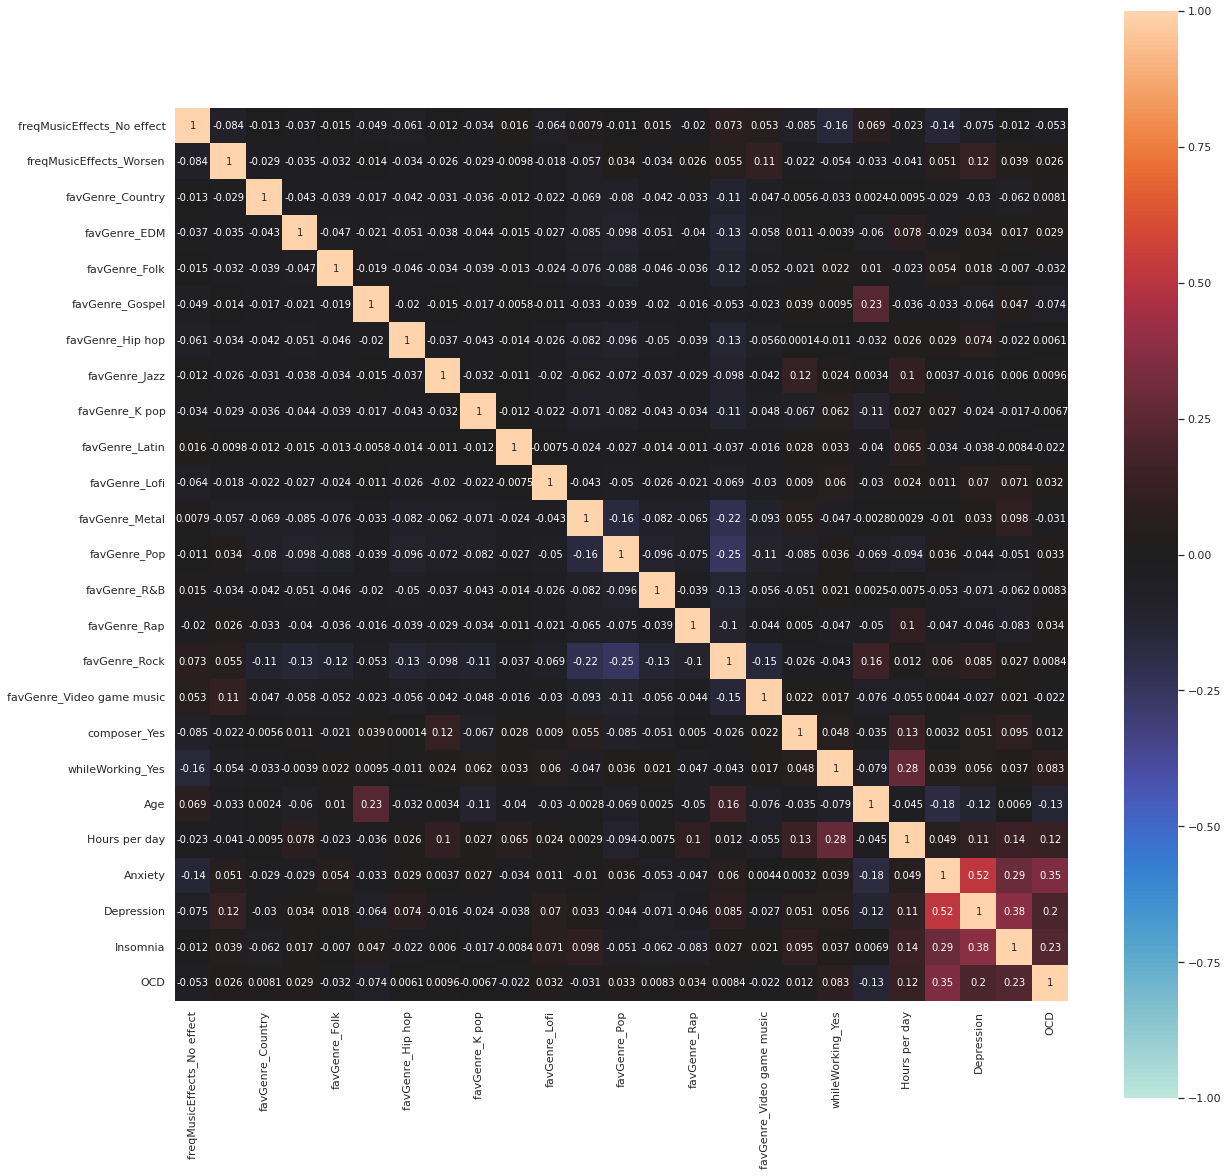

In [ ]:
ax = sns.heatmap(
    fixed_data.corr(),
    annot=True,
    annot_kws={'size': 10},
    vmin=-1, vmax=1, center=0,
    square=True
)
ax.figure.set_size_inches(20, 20)

**Задание 6**

Количественные характеристики датасета необходимо также привести после его обработки.

In [ ]:
fixed_data.head()

,freqMusicEffects_No effect,freqMusicEffects_Worsen,favGenre_Country,favGenre_EDM,favGenre_Folk,favGenre_Gospel,favGenre_Hip hop,favGenre_Jazz,favGenre_K pop,favGenre_Latin,...,favGenre_Rock,favGenre_Video game music,composer_Yes,whileWorking_Yes,Age,Hours per day,Anxiety,Depression,Insomnia,OCD
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,18.0,3.0,3.0,0.0,1.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,63.0,1.5,7.0,2.0,2.0,1.0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,18.0,4.0,7.0,7.0,10.0,2.0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,61.0,2.5,9.0,7.0,3.0,3.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,18.0,4.0,7.0,2.0,5.0,9.0


In [ ]:
fixed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   freqMusicEffects_No effect  736 non-null    uint8  
 1   freqMusicEffects_Worsen     736 non-null    uint8  
 2   favGenre_Country            736 non-null    uint8  
 3   favGenre_EDM                736 non-null    uint8  
 4   favGenre_Folk               736 non-null    uint8  
 5   favGenre_Gospel             736 non-null    uint8  
 6   favGenre_Hip hop            736 non-null    uint8  
 7   favGenre_Jazz               736 non-null    uint8  
 8   favGenre_K pop              736 non-null    uint8  
 9   favGenre_Latin              736 non-null    uint8  
 10  favGenre_Lofi               736 non-null    uint8  
 11  favGenre_Metal              736 non-null    uint8  
 12  favGenre_Pop                736 non-null    uint8  
 13  favGenre_R&B                736 non

In [ ]:
fixed_data.shape

(736, 25)

In [ ]:
fixed_data.describe()

,freqMusicEffects_No effect,freqMusicEffects_Worsen,favGenre_Country,favGenre_EDM,favGenre_Folk,favGenre_Gospel,favGenre_Hip hop,favGenre_Jazz,favGenre_K pop,favGenre_Latin,...,favGenre_Rock,favGenre_Video game music,composer_Yes,whileWorking_Yes,Age,Hours per day,Anxiety,Depression,Insomnia,OCD
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,...,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,0.229620,0.023098,0.033967,0.050272,0.040761,0.008152,0.047554,0.027174,0.035326,0.004076,...,0.255435,0.059783,0.171196,0.790761,25.206522,3.572758,5.837636,4.796196,3.738451,2.637228
std,0.420874,0.150316,0.181268,0.218654,0.197870,0.089982,0.212966,0.162701,0.184728,0.063757,...,0.436402,0.237245,0.376936,0.407042,12.046769,3.028199,2.793054,3.028870,3.088689,2.842017
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,18.000000,2.000000,4.000000,2.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,21.000000,3.000000,6.000000,5.000000,3.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,28.000000,5.000000,8.000000,7.000000,6.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,89.000000,24.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
composer = pd.get_dummies(fixed_data['Composer'], prefix='composer', drop_first=True)
fixed_data = pd.concat([composer, fixed_data], axis=1)
fixed_data = fixed_data.drop('Composer', axis=1)
fav_genre = pd.get_dummies(fixed_data['Fav genre'], prefix='favGenre', drop_first=True)
fixed_data = pd.concat([fav_genre, fixed_data], axis=1)
fixed_data = fixed_data.drop('Fav genre', axis=1)
frequency_pop = pd.get_dummies(fixed_data['Frequency [Pop]'], prefix='freqPop', drop_first=True)
fixed_data = pd.concat([frequency_pop, fixed_data], axis=1)
fixed_data = fixed_data.drop('Frequency [Pop]', axis=1)
frequency_classical = pd.get_dummies(fixed_data['Frequency [Classical]'], prefix='freqClassic', drop_first=True)
fixed_data = pd.concat([frequency_classical, fixed_data], axis=1)
fixed_data = fixed_data.drop('Frequency [Classical]', axis=1)
frequency_country = pd.get_dummies(fixed_data['Frequency [Country]'], prefix='freqCountry', drop_first=True)
fixed_data = pd.concat([frequency_country, fixed_data], axis=1)
fixed_data = fixed_data.drop('Frequency [Country]', axis=1)
frequency_edm = pd.get_dummies(fixed_data['Frequency [EDM]'], prefix='freqEdm', drop_first=True)
fixed_data = pd.concat([frequency_edm, fixed_data], axis=1)
fixed_data = fixed_data.drop('Frequency [EDM]', axis=1)
frequency_folk = pd.get_dummies(fixed_data['Frequency [Folk]'], prefix='freqFolk', drop_first=True)
fixed_data = pd.concat([frequency_folk, fixed_data], axis=1)
fixed_data = fixed_data.drop('Frequency [Folk]', axis=1)
frequency_gospel = pd.get_dummies(fixed_data['Frequency [Gospel]'], prefix='freqGospel', drop_first=True)
fixed_data = pd.concat([frequency_gospel, fixed_data], axis=1)
fixed_data = fixed_data.drop('Frequency [Gospel]', axis=1)
frequency_hh = pd.get_dummies(fixed_data['Frequency [Hip hop]'], prefix='freqHipHop', drop_first=True)
fixed_data = pd.concat([frequency_hh, fixed_data], axis=1)
fixed_data = fixed_data.drop('Frequency [Hip hop]', axis=1)
frequency_jazz = pd.get_dummies(fixed_data['Frequency [Jazz]'], prefix='freqJazz', drop_first=True)
fixed_data = pd.concat([frequency_jazz, fixed_data], axis=1)
fixed_data = fixed_data.drop('Frequency [Jazz]', axis=1)
frequency_kpop = pd.get_dummies(fixed_data['Frequency [K pop]'], prefix='freqKPop', drop_first=True)
fixed_data = pd.concat([frequency_kpop, fixed_data], axis=1)
fixed_data = fixed_data.drop('Frequency [K pop]', axis=1)
frequency_latin = pd.get_dummies(fixed_data['Frequency [Latin]'], prefix='freqLatin', drop_first=True)
fixed_data = pd.concat([frequency_latin, fixed_data], axis=1)
fixed_data = fixed_data.drop('Frequency [Latin]', axis=1)
frequency_lofi = pd.get_dummies(fixed_data['Frequency [Lofi]'], prefix='freqLofi', drop_first=True)
fixed_data = pd.concat([frequency_lofi, fixed_data], axis=1)
fixed_data = fixed_data.drop('Frequency [Lofi]', axis=1)
frequency_metal = pd.get_dummies(fixed_data['Frequency [Metal]'], prefix='freqMetal', drop_first=True)
fixed_data = pd.concat([frequency_metal, fixed_data], axis=1)
fixed_data = fixed_data.drop('Frequency [Metal]', axis=1)
frequency_rb = pd.get_dummies(fixed_data['Frequency [R&B]'], prefix='freqR&B', drop_first=True)
fixed_data = pd.concat([frequency_rb, fixed_data], axis=1)
fixed_data = fixed_data.drop('Frequency [R&B]', axis=1)
frequency_rap = pd.get_dummies(fixed_data['Frequency [Rap]'], prefix='freqRap', drop_first=True)
fixed_data = pd.concat([frequency_rap, fixed_data], axis=1)
fixed_data = fixed_data.drop('Frequency [Rap]', axis=1)
frequency_rock = pd.get_dummies(fixed_data['Frequency [Rock]'], prefix='freqRock', drop_first=True)
fixed_data = pd.concat([frequency_rock, fixed_data], axis=1)
fixed_data = fixed_data.drop('Frequency [Rock]', axis=1)
frequency_vgm = pd.get_dummies(fixed_data['Frequency [Video game music]'], prefix='freqVGM', drop_first=True)
fixed_data = pd.concat([frequency_vgm, fixed_data], axis=1)
fixed_data = fixed_data.drop('Frequency [Video game music]', axis=1)
frequency_meffects = pd.get_dummies(fixed_data['Music effects'], prefix='freqMusicEffects', drop_first=True)
fixed_data = pd.concat([frequency_meffects, fixed_data], axis=1)
fixed_data = fixed_data.drop('Music effects', axis=1)